# **Different datasets with different clustering techniques**

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
!pip install plotnine
from plotnine import *
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

from sklearn.cluster import DBSCAN


from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc
from yellowbrick.cluster import KElbowVisualizer

%matplotlib inline

## **Dataset 1**


In [2]:
d1 = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/KMEM1.csv")

d1.head()

,x,y
0,1.206087,1.847686
1,0.351919,0.245691
2,1.201688,0.630774
3,0.733710,1.364328
4,1.150745,0.724892


In [3]:
d1.isna().sum()

,0
x,0
y,0


In [4]:
d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       200 non-null    float64
 1   y       200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


<Axes: xlabel='x', ylabel='y'>

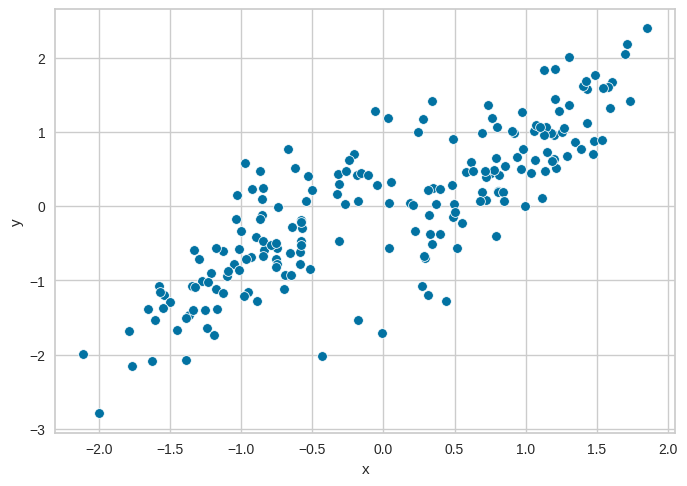

In [5]:
sns.scatterplot(x=d1['x'], y=d1['y'])

#### **Kmeans**

In [6]:
def kmeans(dataset,k):
    model = KMeans(n_clusters=k, random_state=42)
    kmeans_d = model.fit(dataset)
    return kmeans_d.labels_,kmeans_d.cluster_centers_

In [7]:
#elbow method to determine the best k
def elbow(dataset):
    visualizer = KElbowVisualizer(KMeans(), k=(2,12))
    visualizer.fit(dataset)        # Fit the data to the visualizer
    visualizer.show()

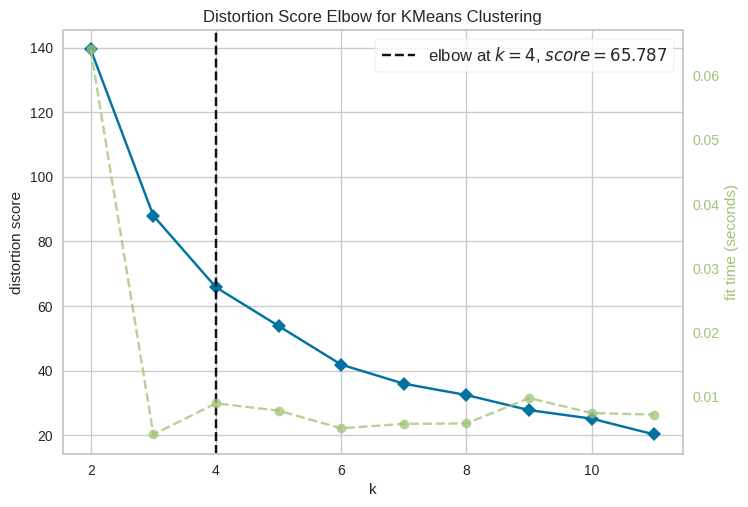

In [8]:
elbow(d1)

In [9]:
#I chose 4 cause there is no almost no difference in silhouette_score between 4 or 5 clusters and I see from the figure that is 4 is well divided
labels_kmeans_1,centroids1=kmeans(d1,4)
print(labels_kmeans_1)

[2 0 2 2 2 0 2 0 2 0 2 2 0 0 0 2 0 1 1 2 0 3 0 2 2 0 0 3 2 0 2 2 2 0 2 3 0
 0 1 0 2 0 2 0 0 2 0 2 0 2 2 0 2 2 0 2 2 0 1 2 0 0 2 2 0 2 2 2 2 2 0 0 2 0
 0 2 2 2 0 0 2 2 0 0 0 2 0 0 2 2 2 0 2 2 0 0 0 3 0 2 1 3 0 0 1 1 1 1 1 3 1
 0 3 3 3 3 3 0 3 1 3 3 1 1 3 3 3 3 1 0 3 3 1 1 3 1 0 3 3 1 1 3 0 0 1 0 3 3
 3 1 1 3 1 3 0 1 1 3 1 1 3 3 3 1 3 3 3 3 1 3 3 3 3 3 3 0 3 1 0 3 3 1 1 3 3
 3 2 1 1 3 1 3 1 0 3 1 3 3 3 1]


In [10]:
silhouette_score(d1,labels_kmeans_1)

0.3947398941243101

In [11]:
def plotting_k(uniqelabels,centroids,labels_kmeans,d):
    for i in uniqelabels:


        plt.scatter(d[labels_kmeans == i ].x , d[labels_kmeans == i ].y )
    plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
    plt.legend()
    plt.show()

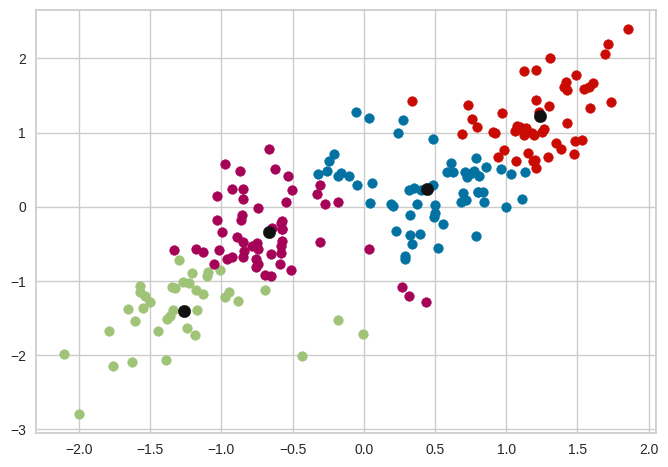

In [12]:
u_labels = np.unique(labels_kmeans_1)
plotting_k(u_labels,centroids1,labels_kmeans_1,d1)

#### **Agglomerative**

In [13]:
def dendo(data,method,metric):
    plt.figure(figsize=(10, 7))
    plt.title("Counters Dendograms")
    return shc.dendrogram(shc.linkage(y=data , method=method,metric=metric),orientation='top')

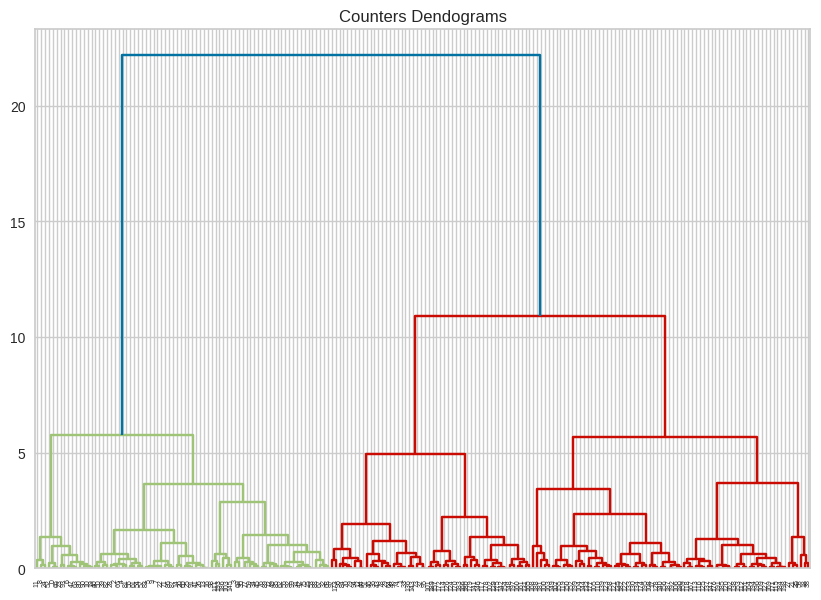

In [14]:
dend=dendo(d1,'ward','euclidean')

In [15]:
def Agglomerative(n_clus,linkage,affinity,d):
    hc = AgglomerativeClustering(n_clusters = n_clus, affinity = affinity, linkage = linkage)
    y_hc = hc.fit_predict(d)
    return(y_hc)

In [17]:
def Agglomerative(n_clus,linkage,d):
    """
    Performs Agglomerative Clustering.

    Args:
        n_clus: The number of clusters.
        linkage: The linkage method to use ('ward', 'complete', 'average', 'single').
        d: The input data.

    Returns:
        y_hc: The cluster labels for each data point.
    """
    # If linkage is 'ward', don't pass the affinity argument
    if linkage == 'ward':
        hc = AgglomerativeClustering(n_clusters=n_clus, linkage=linkage)
    else:
        hc = AgglomerativeClustering(n_clusters=n_clus, affinity='euclidean', linkage=linkage)  # Use 'euclidean' affinity for other linkage methods

    y_hc = hc.fit_predict(d)
    return y_hc

In [19]:
# Assuming 'd1' is your data and you want 3 clusters using 'ward' linkage:
y_hc = Agglomerative(n_clus=3, linkage='ward', d=d1)

# Now you can calculate the silhouette score:
silhouette_score(d1, y_hc, metric='euclidean')

0.41567707625984956

#### **DBSCAN**

In [20]:
from collections import Counter
def dbscan(data):
    for i in np.arange (0.1,5,0.1):
        for j in range (4,7):
            clusters = DBSCAN(eps = i, min_samples = j).fit(data)
            if len(set(clusters.labels_))!=1:
                print(f"eps is {i}, min_sam is {j} ")
                print(clusters.labels_)
                print(Counter(clusters.labels_))
                print(silhouette_score(data,clusters.labels_))

In [21]:
dbscan(d1)

eps is 0.1, min_sam is 4 
[-1 -1 -1 -1 -1  0 -1  0 -1  0 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1  0 -1
 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1  0 -1 -1  1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1  1 -1 -1  1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1  0 -1 -1 -1 -1  1 -1 -1 -1
 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1  5 -1 -1 -1  5 -1  4 -1 -1 -1 -1
  2 -1 -1 -1 -1 -1 -1 -1 -1  3 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  3 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  3 -1 -1 -1 -1 -1 -1 -1  2 -1  4 -1 -1 -1
 -1  4 -1  4 -1 -1 -1  3  2 -1 -1 -1 -1 -1 -1 -1  4  2 -1 -1 -1 -1 -1  2
 -1 -1  5 -1 -1 -1  4 -1]
Counter({-1: 166, 1: 9, 0: 7, 4: 6, 2: 5, 3: 4, 5: 3})
-0.43733264734404814
eps is 0.1, min_sam is 5 
[-1 -1 -1 -1 -1  0 -1  0 -1  0 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1  0 -1
 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1  1 -1 -1  1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 

In [22]:
def plot_db(eps,min_samples,d):
    clusters = DBSCAN(eps = eps, min_samples = min_samples).fit(d)

    p = sns.scatterplot(data = d, x = d['x'], y = d['y'], hue = clusters.labels_, legend = "full", palette = "tab10")
    sns.move_legend(p, "upper right", bbox_to_anchor = (1.17, 1.), title = 'Clusters')
    plt.show()

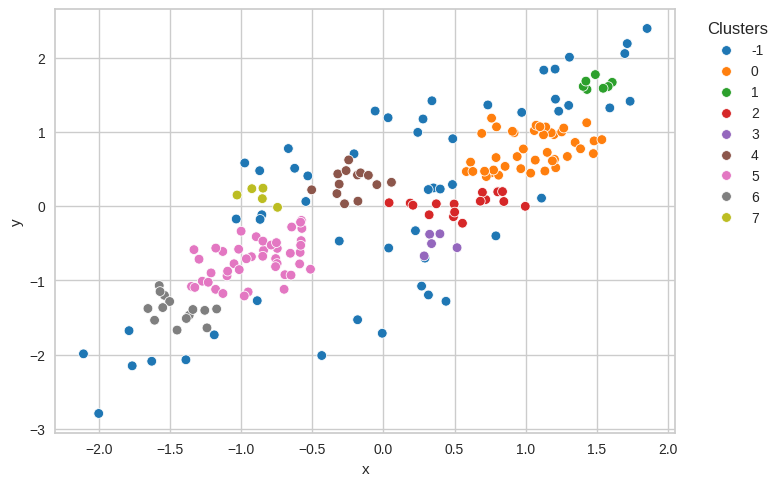

In [23]:
plot_db(0.2,5,d1)

## **Dataset 2**

In [24]:
d2 = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/KMEM2.csv")
d2.head()

,x,y
0,1.578527,1.408111
1,1.748206,0.441915
2,1.523151,0.681521
3,1.318949,0.362971
4,0.977164,-0.373589


In [25]:
d2.isna().sum()

,0
x,0
y,0


<Axes: xlabel='x', ylabel='y'>

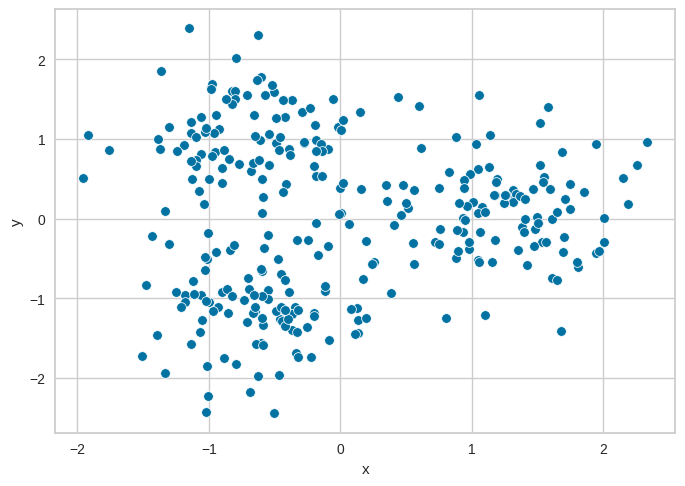

In [26]:
sns.scatterplot(x=d2['x'], y=d2['y'])

#### **Kmeans**

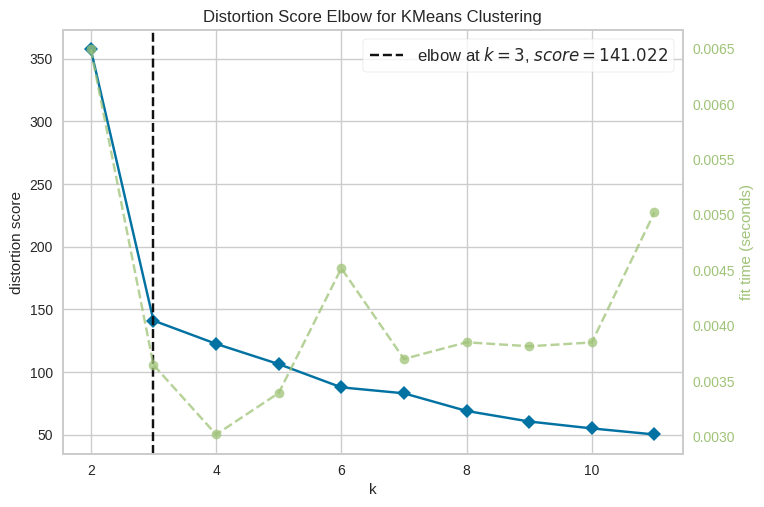

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [27]:
visualizer = KElbowVisualizer(KMeans(), k=(2,12))
visualizer.fit(d2)        # Fit the data to the visualizer
visualizer.show()

In [28]:
labels_kmeans_2,centroids2=kmeans(d2,3)
print(labels_kmeans_2)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]


In [29]:
silhouette_score(d2,labels_kmeans_2)

0.5583157663135309

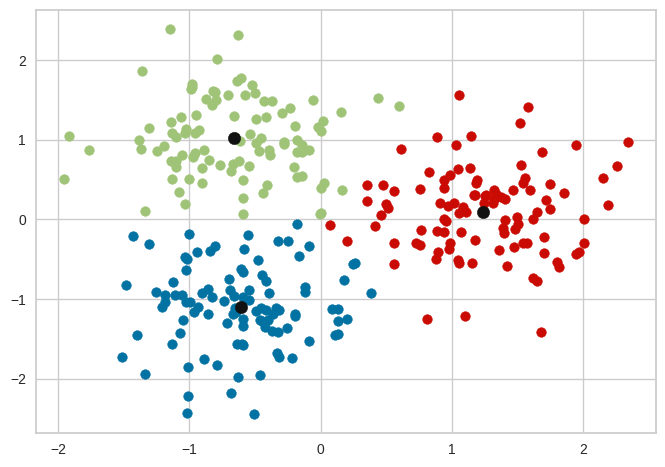

In [30]:
u_labels2 = np.unique(labels_kmeans_2)
plotting_k(u_labels2,centroids2,labels_kmeans_2,d2)

#### **Agglomerative**

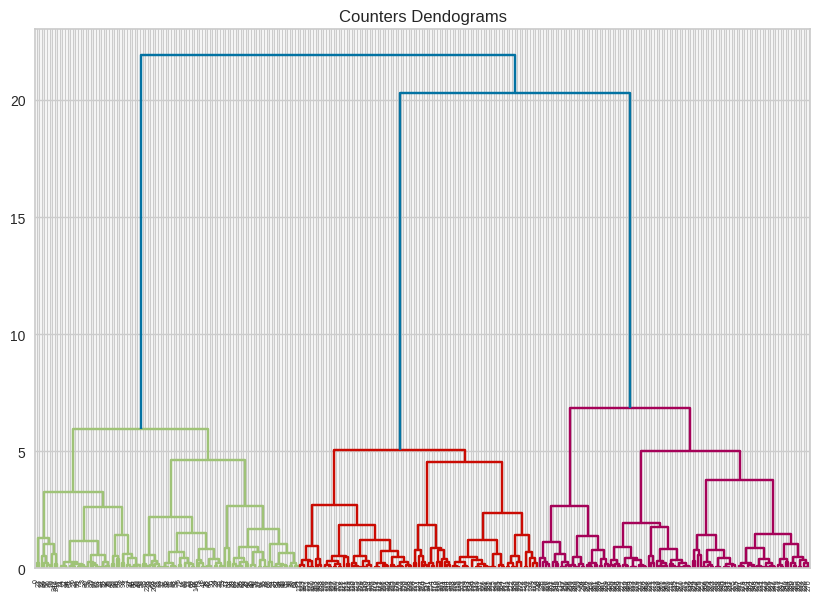

In [31]:
dend=dendo(d2,'ward','euclidean')

In [34]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import numpy as np  # Assuming you are using numpy for d2

# Assuming d2 is your data

# Instantiate the AgglomerativeClustering class, removing the affinity argument
agg_clustering = AgglomerativeClustering(n_clusters=3, linkage='ward')

# Fit the model and get cluster labels
y_hc2 = agg_clustering.fit_predict(d2)

print(y_hc2)
silhouette_score(d2, y_hc2, metric='euclidean')

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 0 2 2 2
 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 0 1 0
 2 2 2 2 2 2 2 2 0 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 0 2 0 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]


0.5331004784160976

#### **DBSCAN**

In [35]:
dbscan(d2)

eps is 0.1, min_sam is 4 
[-1 -1 -1  0 -1 -1  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  2 -1 -1 -1 -1 -1
  1 -1 -1 -1 -1 -1  0  0  0 -1  1 -1 -1  2 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0 -1 -1  1 -1 -1 -1 -1 -1  0
 -1  0  0 -1  2 -1 -1 -1 -1 -1  1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1  0 -1
 -1 -1  2 -1 -1  3  4 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  5  3 -1 -1  4 -1
  6 -1 -1 -1 -1 -1  3  4 -1 -1 -1 -1 -1 -1 -1 -1  3  3 -1  3 -1 -1 -1 -1
 -1 -1 -1 -1 -1  3 -1 -1 -1  3 -1 -1 -1 -1  3 -1 -1 -1 -1 -1 -1 -1  5  3
 -1 -1 -1  5 -1 -1 -1  6  5 -1 -1 -1 -1 -1  6  4 -1  3 -1 -1 -1 -1 -1 -1
 -1  6 -1 -1 -1 -1 -1 -1 -1 -1  7  8 -1 -1 -1  7 -1 -1 -1 -1 10  8 -1  9
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  9 -1 10 -1 -1 -1
 -1  9 -1 -1 -1 -1 -1 -1  7 -1 10 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1  8 -1  7  8 -1 -1 -1 -1 10  7 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1  9 10 -1 -1 -1 -1 -1 -1 -1 -1]
Counter({-1: 239, 0: 11, 3: 11, 1: 5, 7: 5, 10: 5, 2: 4, 4: 

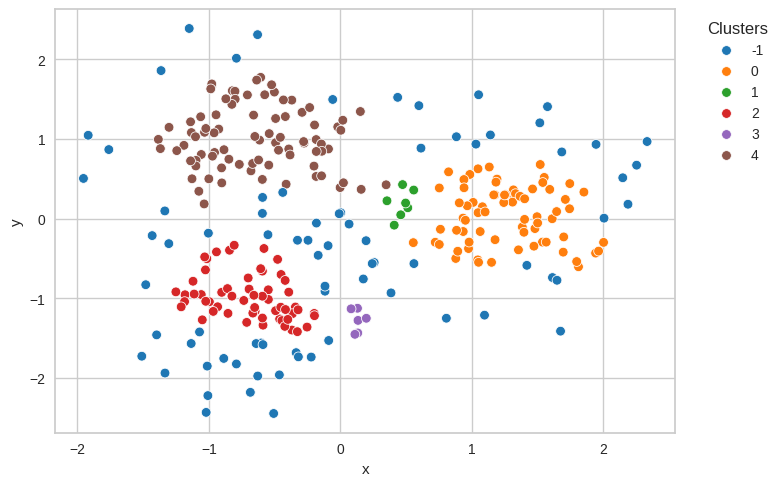

In [36]:
# eps is 0.2, min_sam is 4
plot_db(0.2,4,d2)

## **Dataset 3**

In [37]:
d3 = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/KMEM3.csv")
d3.head()

,x,y
0,1.332228,0.178299
1,1.256056,0.146765
2,1.477661,0.155054
3,1.384840,0.022054
4,1.526956,0.267920


In [38]:
d3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       300 non-null    float64
 1   y       300 non-null    float64
dtypes: float64(2)
memory usage: 4.8 KB


<Axes: xlabel='x', ylabel='y'>

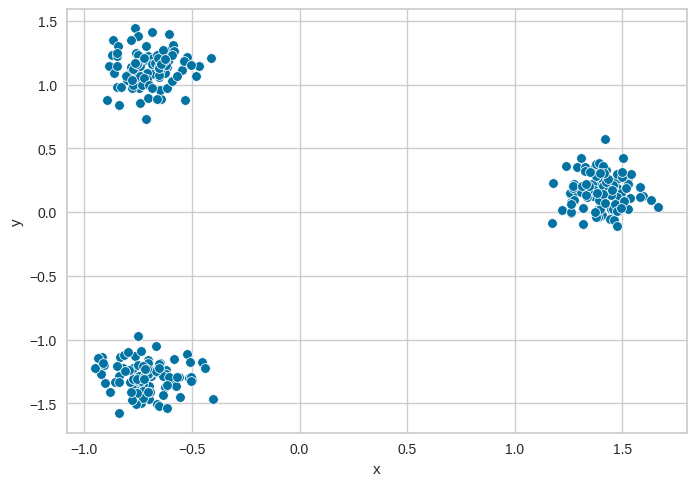

In [39]:
sns.scatterplot(x=d3['x'], y=d3['y'])

#### **Kmeans**

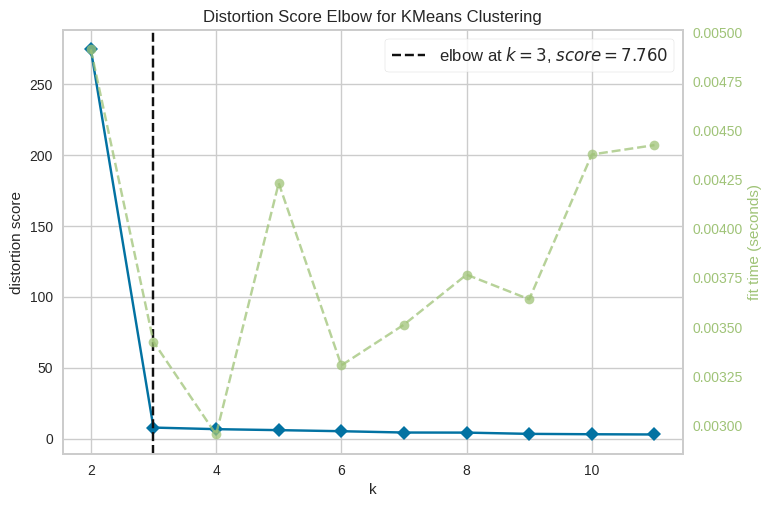

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [40]:
#elbow
visualizer = KElbowVisualizer(KMeans(), k=(2,12))
visualizer.fit(d3)        # Fit the data to the visualizer
visualizer.show()

In [41]:
labels_kmeans_3,centroids3=kmeans(d3,3)
print(labels_kmeans_3)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]


In [42]:
silhouette_score(d3,labels_kmeans_3)

0.913619050733588

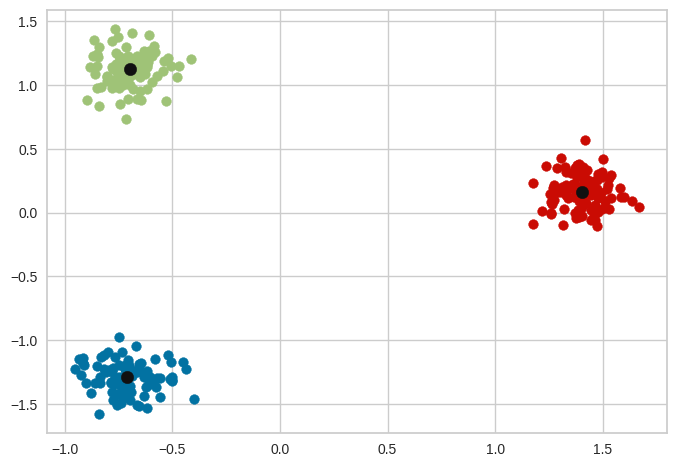

In [43]:
u_labels3 = np.unique(labels_kmeans_3)
plotting_k(u_labels3,centroids3,labels_kmeans_3,d3)

#### **Agglomerative**

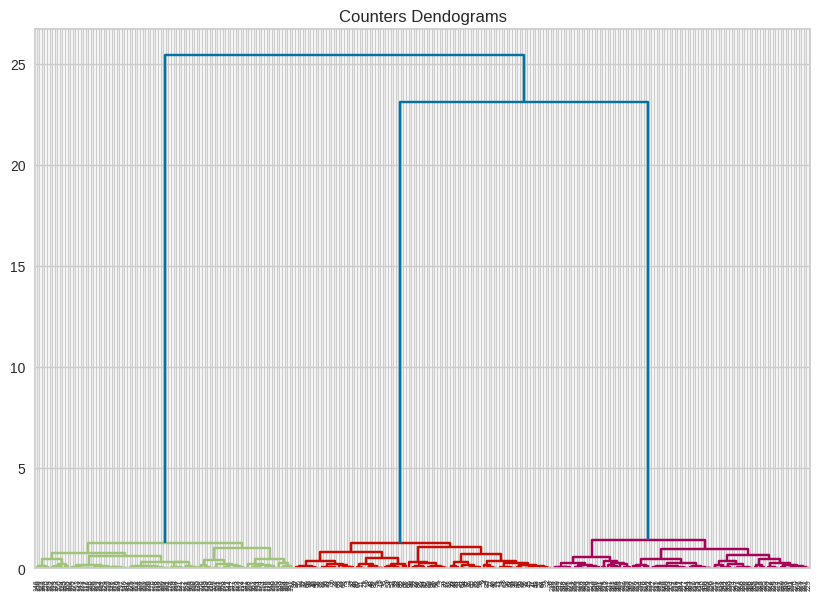

In [44]:
dend=dendo(d3,'ward','euclidean')

In [47]:
from sklearn.cluster import AgglomerativeClustering

def Agglomerative(n_clusters, linkage, affinity, data):
    """
    Performs Agglomerative Clustering on the provided data.

    Args:
        n_clusters (int): The number of clusters to form.
        linkage (str): Which linkage criterion to use.
                       Valid options are: 'ward', 'complete', 'average', 'single'.
        affinity (str): Metric used to compute the linkage.
                        Valid options are: 'euclidean', 'l1', 'l2', 'manhattan', 'cosine', or 'precomputed'.
        data (array-like): The data to be clustered.

    Returns:
        array-like: Cluster labels for each data point.
    """

    # If linkage is 'ward', affinity must be 'euclidean' and is implicitly used
    # So we remove the affinity argument in this case
    if linkage == 'ward':
        cluster = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage)
    else:
        cluster = AgglomerativeClustering(n_clusters=n_clusters, affinity=affinity, linkage=linkage)

    # Fit the model to the data and predict the cluster labels
    labels = cluster.fit_predict(data)

    return labels

# Call the function with your data
y_hc3 = Agglomerative(3, 'ward', 'euclidean', d3)
print(y_hc3)
from sklearn.metrics import silhouette_score
silhouette_score(d3, y_hc3, metric='euclidean')

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]


0.913619050733588

#### **DBSCAN**

In [48]:
dbscan(d3)
#best : eps is 0.2, min_sam is 6

eps is 0.1, min_sam is 4 
[ 0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1 -1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2 -1  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2 -1  2  2  2  2  2  2  2  2  2 -1  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2]
Counter({0: 97, 1: 97, 2: 97, -1: 9})
0.8365571322119059
eps

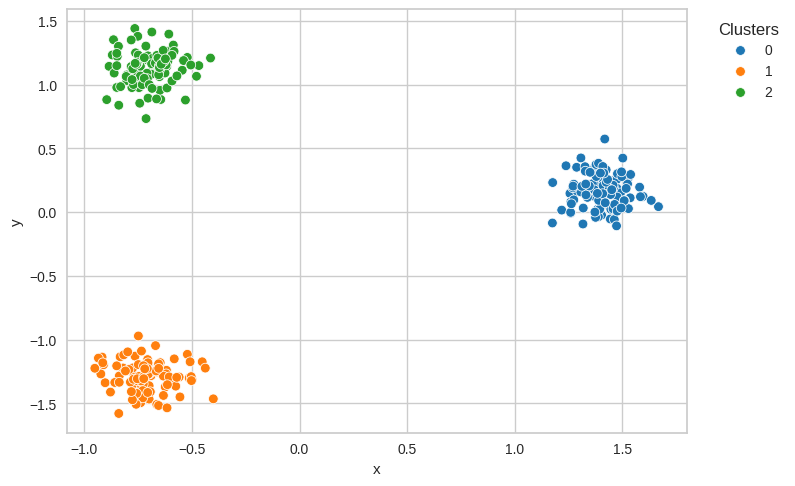

In [49]:
plot_db(0.2,6,d3)

## **Dataset 4**

In [50]:
d4 = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/KMEM4.csv")
d4.head()

,x,y
0,-0.006848,0.395527
1,0.314820,-0.289261
2,0.171705,1.078077
3,-1.203661,1.325926
4,-0.179379,-0.036615


In [51]:
d4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       600 non-null    float64
 1   y       600 non-null    float64
dtypes: float64(2)
memory usage: 9.5 KB


<Axes: xlabel='x', ylabel='y'>

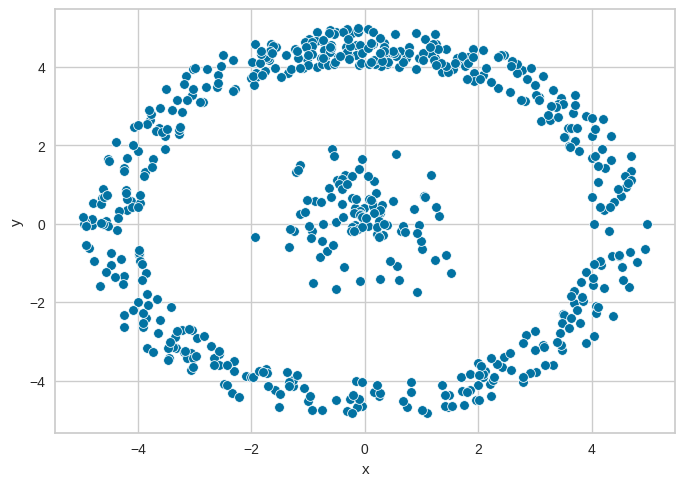

In [52]:
sns.scatterplot(x=d4['x'], y=d4['y'])

#### **Kmeans**

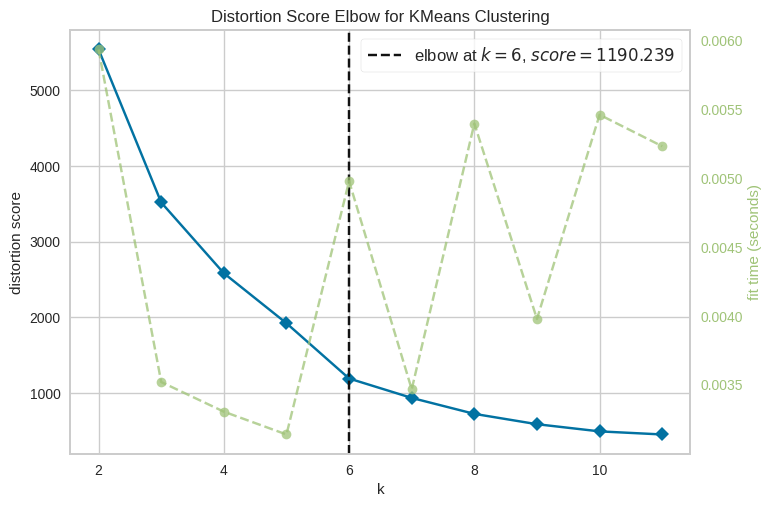

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [53]:
#elbow
visualizer = KElbowVisualizer(KMeans(), k=(2,12))
visualizer.fit(d4)        # Fit the data to the visualizer
visualizer.show()

In [54]:
labels_kmeans_4,centroids4=kmeans(d4,6)
print(labels_kmeans_4)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 4 4 5 5 4 4 0 5 1 0 4
 4 1 5 1 3 4 4 3 3 4 0 3 4 5 4 4 4 0 1 0 4 1 0 4 4 1 4 4 5 0 4 5 3 3 5 5 0
 4 0 3 4 5 4 5 3 0 3 4 1 5 5 4 0 1 4 4 1 1 0 3 5 5 1 5 0 1 3 0 3 5 4 0 3 4
 5 4 5 0 4 5 4 1 5 4 4 5 5 3 5 4 0 0 1 0 0 3 4 5 1 0 1 1 5 4 0 3 1 4 5 5 1
 0 3 0 4 0 0 4 0 0 1 0 1 4 4 5 5 0 0 4 1 4 1 4 4 4 0 4 3 1 1 4 5 5 4 0 4 3
 1 4 4 3 1 4 1 4 0 3 1 1 3 0 4 3 3 4 3 5 3 0 3 5 4 4 1 0 4 3 5 5 3 1 0 3 3
 5 5 3 3 5 4 1 5 0 1 1 3 4 5 1 1 4 0 5 0 5 1 4 4 3 4 3 4 3 3 5 1 4 3 4 1 5
 4 5 3 5 1 0 4 0 4 4 1 3 4 1 4 1 4 4 0 3 4 1 3 1 5 0 1 4 0 4 1 3 4 1 4 5 4
 1 4 4 0 1 3 4 4 1 4 3 4 4 4 3 4 4 3 5 1 5 5 3 0 5 5 3 1 4 5 5 4 5 4 1 4 0
 4 3 1 3 4 4 3 1 3 4 5 4 4 3 5 0 4 0 4 4 5 5 3 4 0 1 5 5 4 0 4 3 5 1 4 4 5
 1 3 4 5 0 1 0 1 0 4 5 1 4 1 0 0 4 5 5 4 1 0 0 5 0 4 4 0 3 3 4 4 4 4 5 0 4
 3 1 0 0 4 5 0 3 5 0 5 4 

In [55]:
silhouette_score(d4,labels_kmeans_4)

0.5435028641729902

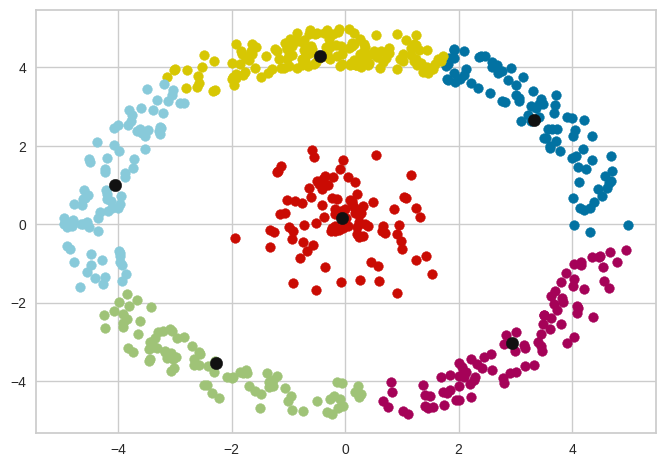

In [56]:
u_labels4 = np.unique(labels_kmeans_4)
plotting_k(u_labels4,centroids4,labels_kmeans_4,d4)

#### **Agglomerative**

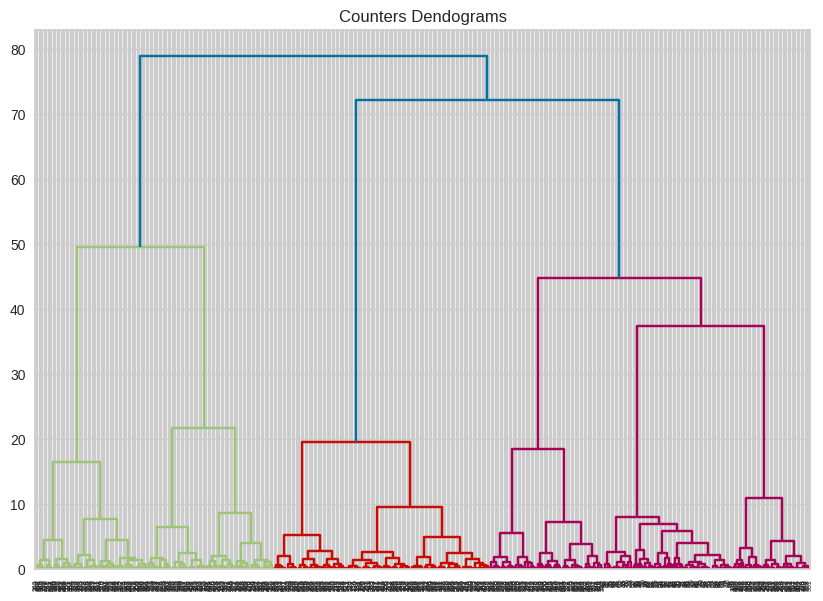

In [57]:
dend=dendo(d4,'ward','euclidean')

In [58]:
y_hc4=Agglomerative(6,'ward','euclidean',d4)
print(y_hc4)
silhouette_score(d4, y_hc4, metric='euclidean')

[5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 2 2 0 0 2 2 4 0 3 4 2
 2 3 0 3 1 2 2 1 1 2 4 1 2 0 2 2 2 4 3 4 0 3 4 2 2 3 2 2 0 4 2 0 1 1 0 0 4
 2 2 1 2 0 2 0 1 4 1 2 3 0 0 2 2 3 2 2 3 3 2 1 0 0 3 0 4 3 1 4 1 0 2 4 1 2
 0 2 0 4 2 0 0 3 0 2 2 0 0 1 0 2 4 4 3 4 2 1 2 0 3 4 3 3 0 2 2 1 3 2 0 0 3
 2 1 4 2 4 4 2 2 2 3 2 3 2 2 0 0 4 2 2 3 2 3 2 2 0 4 2 1 3 3 2 0 0 2 4 2 1
 3 2 0 1 3 2 3 0 4 1 3 3 1 4 2 1 1 0 1 0 1 4 1 0 2 2 3 4 2 1 0 0 1 3 4 1 1
 0 0 1 1 0 2 3 0 4 3 3 1 2 0 3 3 2 4 0 2 0 3 2 2 1 2 1 0 1 1 0 3 2 1 2 3 0
 2 0 1 0 3 2 2 4 2 2 3 1 2 3 2 3 2 2 4 1 2 3 1 3 0 2 3 2 4 2 3 1 2 3 2 0 2
 3 2 2 4 3 1 2 2 3 2 1 2 2 2 1 2 2 1 0 3 0 0 1 2 0 0 1 3 2 0 0 2 0 2 3 2 4
 2 1 3 1 2 2 1 3 1 2 0 2 2 1 0 4 2 2 2 2 0 0 1 2 2 3 0 0 2 4 2 1 0 3 2 2 0
 3 1 2 0 4 3 4 3 4 2 0 3 2 3 4 4 2 0 0 2 3 4 4 0 4 0 2 4 1 1 2 2 2 2 0 4 2
 1 3 2 4 0 0 2 1 0 4 0 2 

0.5374567295884447

#### **DBSCAN**

In [59]:
dbscan(d4)
# eps is 0.6, min_sam is 4

eps is 0.1, min_sam is 4 
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0 -1 -1  0 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1  0 -1 -1 -1 -1  1 -1 -1 -1 -1
 -1 -1 -1 -1  1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0
 -1 -1 -1 -1 -1  2 -1 -1 -1  2 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  2  7 -1 -1
  2 -1 -1 -1  5 -1 -1  2 -1 -1 -1 -1 -1 -1  2 -1 -1  3 -1 -1 -1 -1 -1 -1
 -1 -1  5 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  4 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1  4 -1  5 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  6 -1 -1 -1 -1  3 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1  9 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  6 -1 -1 -1 -1
 -1 -1 -1 -1  8 -1 -1 -1 -1 -1  8 -1 -1 -1 -1 -1 -1 -1 -1  7  3 -1 -1 -1
 -1 -1 -1 -1 -1 -1  8 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 

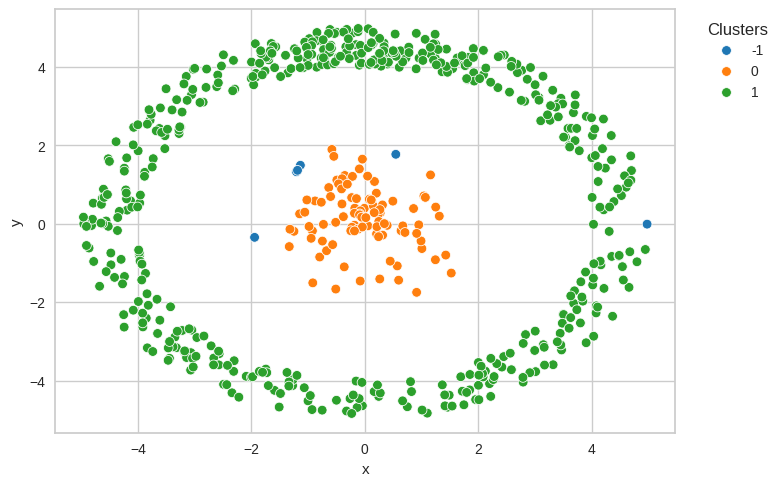

In [60]:
plot_db(0.6,4,d4)

### **Compare**

In [61]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

hac = AgglomerativeClustering(2)
km = KMeans(2)
gm = GaussianMixture(2)

hac.fit(d4[["x","y"]])
km.fit(d4[["x","y"]])
gm.fit(d4[["x","y"]])

d4["hac"] = hac.labels_
d4["km"] = km.labels_
d4["gm"] = gm.predict(d4[["x","y"]])


print(ggplot(d4, aes(x = "x", y = "y",
                    color = "factor(hac)")) +
             geom_point() +
             theme_minimal() +
             scale_color_discrete(name = "Cluster Assignment") +
             theme(panel_grid_major = element_blank()) +
             labs(title = "Hierarchical Agglomeretive"))


print(ggplot(d4, aes(x = "x", y = "y",
                    color = "factor(km)")) +
             geom_point() +
             theme_minimal() +
             scale_color_discrete(name = "Cluster Assignment") +
             theme(panel_grid_major = element_blank()) +
             labs(title = "KMeans"))
print(ggplot(d4, aes(x = "x", y = "y",
                    color = "factor(gm)")) +
             geom_point() +
             theme_minimal() +
             scale_color_discrete(name = "Cluster Assignment") +
             theme(panel_grid_major = element_blank()) +
             labs(title = "Gaussian Mixtures"))

<ggplot: (640 x 480)>
<ggplot: (640 x 480)>
<ggplot: (640 x 480)>


## **Dataset 5**

In [62]:
d5 = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/KMEM5.csv")
d5.head()

,x,y
0,2.852449,-0.324568
1,2.346342,-0.729224
2,2.229033,-0.599340
3,2.458669,-0.385467
4,2.844177,-0.196813


In [63]:
d5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       450 non-null    float64
 1   y       450 non-null    float64
dtypes: float64(2)
memory usage: 7.2 KB


<Axes: xlabel='x', ylabel='y'>

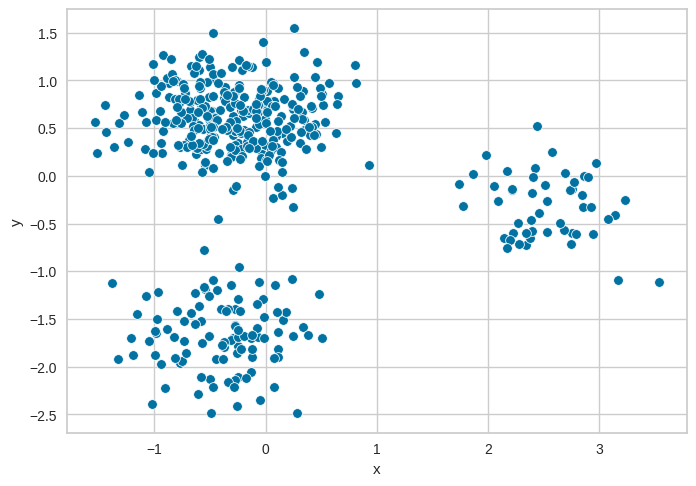

In [64]:
sns.scatterplot(x=d5['x'], y=d5['y'])

#### **Kmeans**

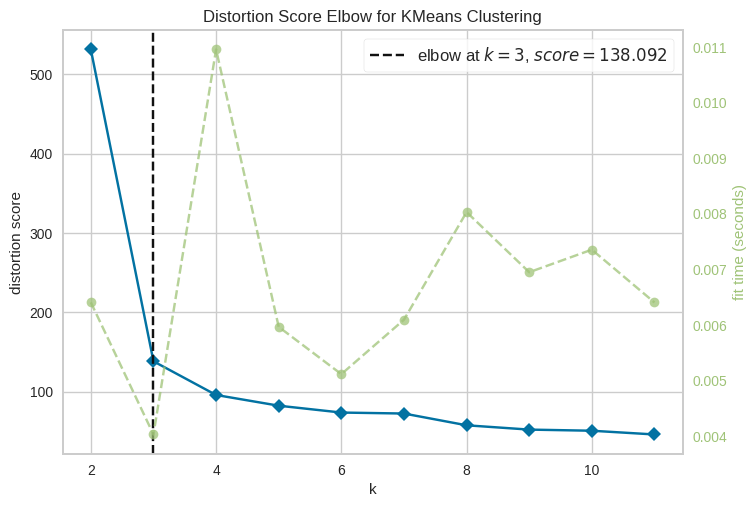

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [65]:
#elbow
visualizer = KElbowVisualizer(KMeans(), k=(2,12))
visualizer.fit(d5)        # Fit the data to the visualizer
visualizer.show()

In [66]:
labels_kmeans_5,centroids5=kmeans(d5,3)
print(labels_kmeans_5)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0]


In [67]:
silhouette_score(d5,labels_kmeans_5)

0.7043537508086658

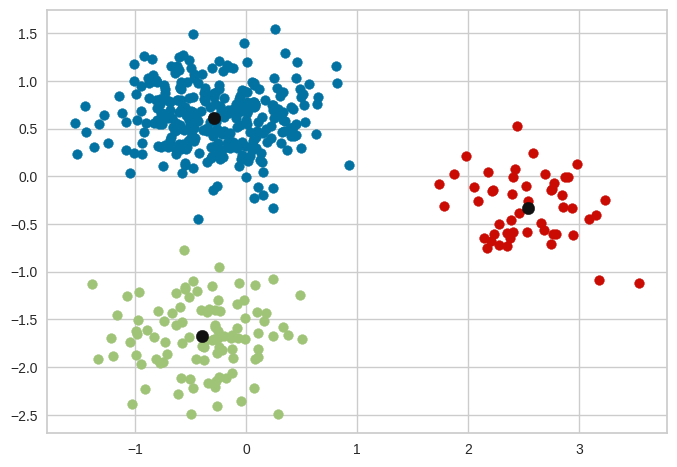

In [68]:
u_labels5 = np.unique(labels_kmeans_5)
plotting_k(u_labels5,centroids5,labels_kmeans_5,d5)

#### **Agglomerative**

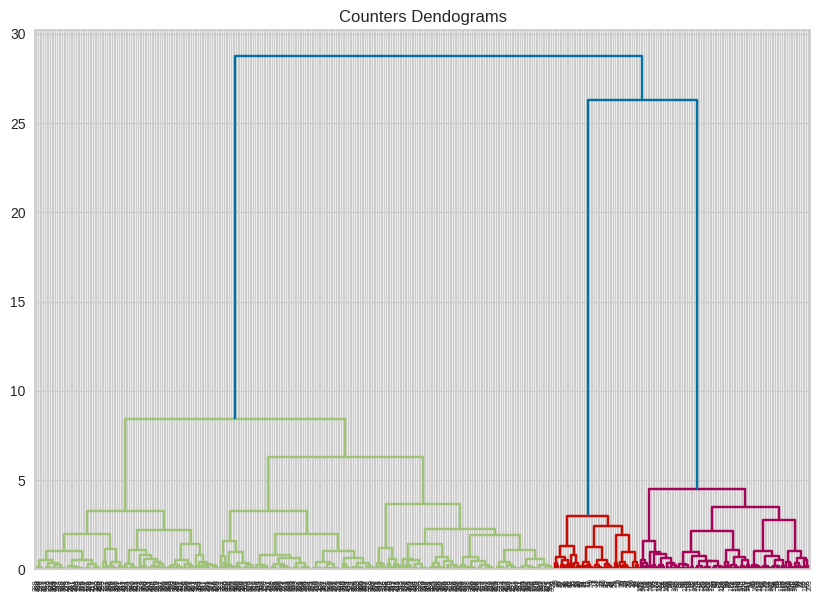

In [69]:
dend=dendo(d5,'ward','euclidean')

In [70]:
y_hc5=Agglomerative(3,'ward','euclidean',d5)
print(y_hc5)
silhouette_score(d5, y_hc5, metric='euclidean')

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0]


0.7031189213721806

#### **DBSCAN**

In [71]:
dbscan(d5)
# 0.30000000000000004, min_sam is 4

eps is 0.1, min_sam is 4 
[-1  1  0 -1 -1 -1 -1  0 -1 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1 -1 -1  0 -1
 -1 -1 -1  1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0 -1 -1  1
 -1 -1  2  6  2  2  2  3 -1 -1  2 -1  3 -1  4  2 -1 -1 -1  4 -1  3 -1  2
 -1 -1 -1 -1 -1 -1 -1 -1 -1  5  2 -1  2 -1 -1  6 -1 -1 -1 -1 -1  5 -1 -1
 -1 -1 -1 -1 -1 -1  5 -1  3 -1  2 -1 -1 -1  2 -1 -1 -1 -1 -1  2 -1  6  6
  2 -1 -1 -1  2  2  2 -1  5 -1  2  2  2 -1  4  6  4 -1 -1  4 -1 -1 -1 -1
 -1 -1  6 -1 -1 -1  7  7  7  7 -1 -1  7  7  7  7  7  7  9  7  7  8  7  7
 -1  7  7  7 -1  7  7  7  7  7  9  7  7  7  7  7  7  7  7  7  7 -1  7 -1
  7  7 -1  7  7  7  7  7 -1 -1  7  7 10  7 -1  7  7  8  7  7 -1  7  7  7
  7  7  7  7  7  7 -1  7 -1 -1 -1  7  7  7  7  7  7  7  7 -1  8 -1  7  7
  7 -1 -1 10  7 11  7  7  7  7 -1  7  7  7  7  7  7  7 -1 -1  7  7  7  7
  7  7 10  7  7 -1 -1 -1  7  7  7  7  7  7  7  7  7  7  7 -1  7  7  9  7
  7  7  7  7  7  7  7  7  7  7  7 11 -1  7  7  7  7  8 -1  7  7  7  7  7
  7  7 -1  7  7  9  7 -1 

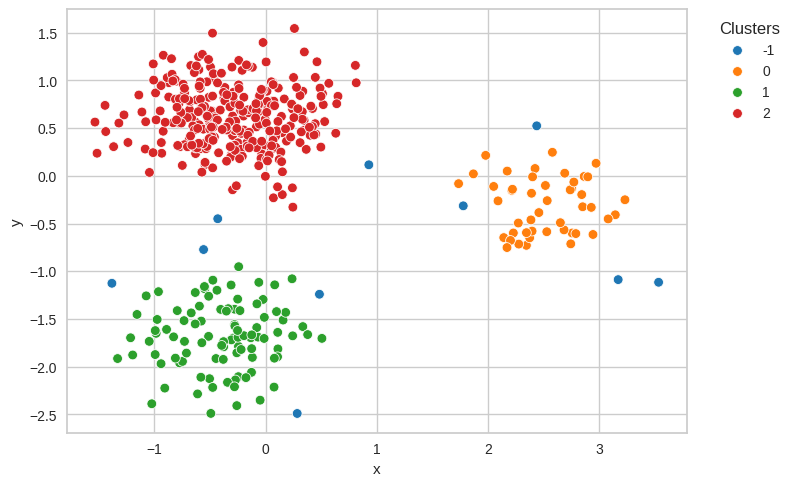

In [72]:
plot_db(0.3,4,d5)

## **Dataset 6**

In [73]:
d6 = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/KMEM6.csv")
d6.head()

,x,y
0,0.712520,0.653491
1,0.910914,0.068242
2,0.750752,0.526512
3,0.666605,0.584747
4,0.403062,0.956459


In [74]:
d6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       300 non-null    float64
 1   y       300 non-null    float64
dtypes: float64(2)
memory usage: 4.8 KB


<Axes: xlabel='x', ylabel='y'>

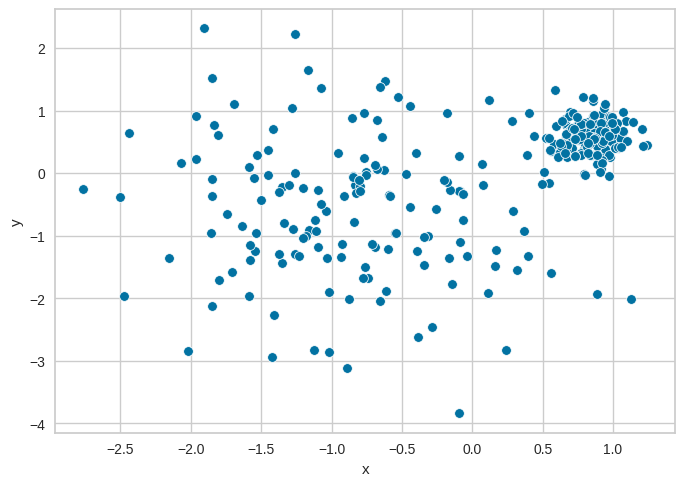

In [75]:
sns.scatterplot(x=d6['x'], y=d6['y'])

#### **Kmeans**

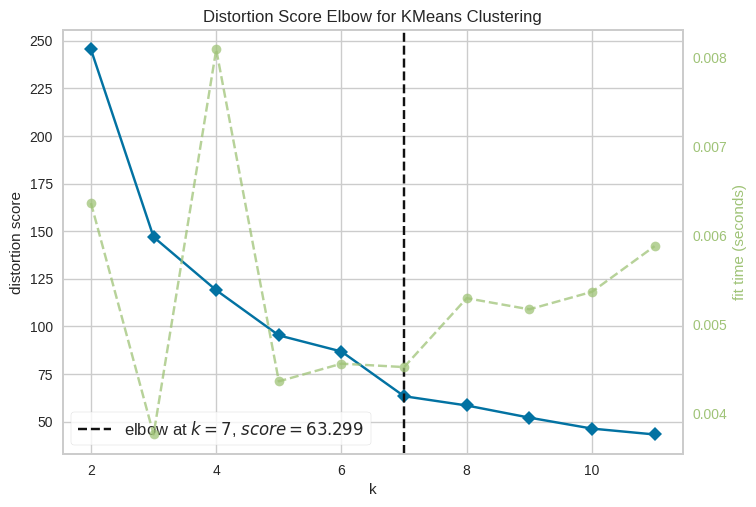

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [76]:
#elbow
visualizer = KElbowVisualizer(KMeans(), k=(2,12))
visualizer.fit(d6)        # Fit the data to the visualizer
visualizer.show()

In [77]:
labels_kmeans_6,centroids6=kmeans(d6,5)
print(labels_kmeans_6)

[4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 0 1 0 4 2 0 1 3 3 4 0 0 2 2 2 1 0 2 0 1 2 0 1 2 0 4 3 1 3 3 2 0 0 4 2
 2 2 1 3 2 1 1 2 2 1 0 0 1 1 1 2 1 1 2 2 0 4 2 0 2 1 1 2 1 0 1 2 3 0 0 2 1
 1 2 1 3 2 3 2 2 3 2 2 2 0 0 2 2 1 2 1 0 2 2 1 2 0 2 2 1 3 2 1 3 1 3 0 1 0
 4 1 1 2 1 0 1 0 1 1 0 1 2 2 1 3 1 3 2 1 1 1 2 3 1 3 0 1 4 0 1 2 3 2 1 2 3
 1 2 3 0]


In [78]:
silhouette_score(d6,labels_kmeans_6)

0.5171024445934513

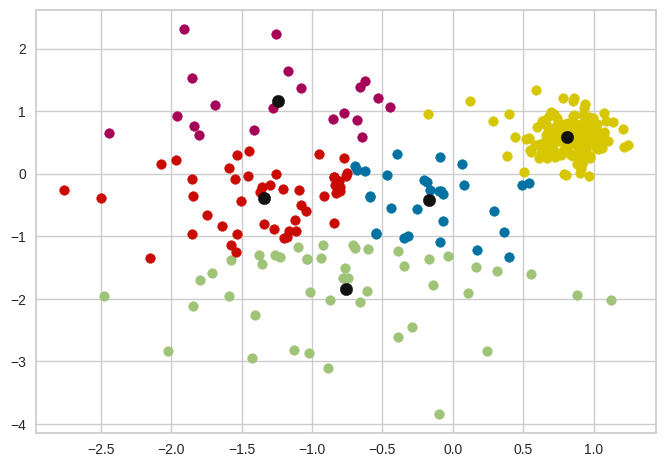

In [79]:
u_labels6 = np.unique(labels_kmeans_6)
plotting_k(u_labels6,centroids6,labels_kmeans_6,d6)

#### **Agglomerative**

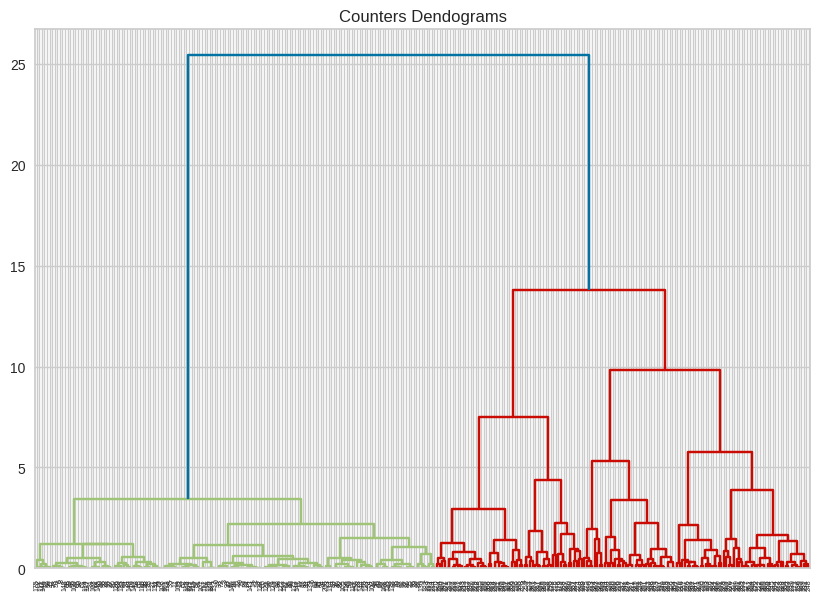

In [80]:
dend=dendo(d6,'ward','euclidean')

In [81]:
y_hc6=Agglomerative(2,'ward','euclidean',d6)
print(y_hc6)
silhouette_score(d6, y_hc6, metric='euclidean')

[1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]


0.5538801329572542

#### **DBSCAN**

In [82]:
dbscan(d6)

eps is 0.1, min_sam is 4 
[ 0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  1 -1
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0 -1  0  0  0 -1  0  0  0
  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  1 -1  0  0  0  0  0  0 -1
  0  0  0  0  0  0  0  0  0  0 -1  0  0  0 -1  0  0  0  0  0  0  0  0  0
  0  0  1  0  0 -1  3 -1  2 -1 -1  3 -1 -1 -1 -1 -1  2  4 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  4 -1 -1  0 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  2 -1 -1 -1 -1 -1 -1  4 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  4 -1 -1 -1  3 -1  3 -1 -1 -1 -1
 -1 -1  4  4 -1 -1  2 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1  4 -1 -1]
Counter({-1: 147, 0: 134, 4: 7, 1: 4, 3: 4, 2: 4})
0.0391286

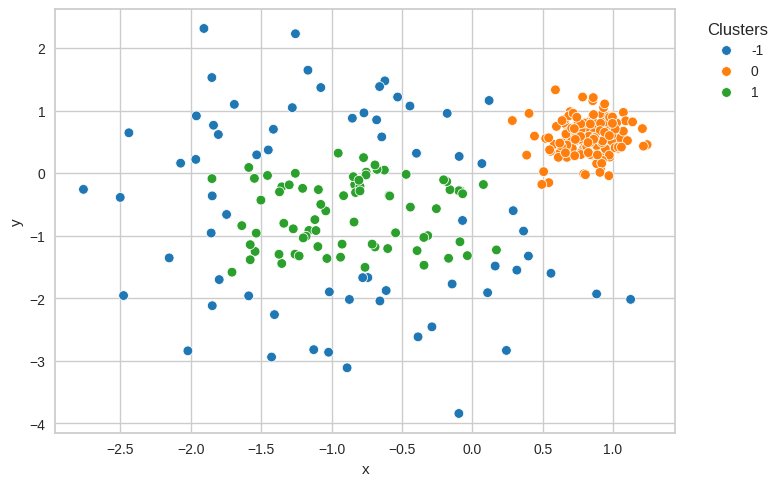

In [83]:
plot_db(0.304,6,d6)